# Question 1

## (i)

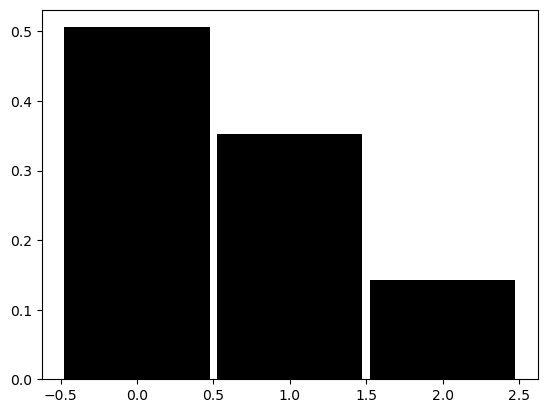

In [3]:
# import packages for basic math, plotting, linear algebra, etc.
from numpy import *
from numpy.linalg import *
from numpy.random import *
from matplotlib.pyplot import *
from scipy.special import binom, erf, erfc

class histogram(): # histogram class
    def __init__(self,limits,binwidth):
        self.limits = limits
        self.binwidth = binwidth
        self.vals = arange(self.limits[0] + self.binwidth / 2, self.limits[1], self.binwidth)
        self.histo = 0 * self.vals
        self.N_samples = 0

    def add_sample(self,dat):
        self.N_samples += 1
        if dat > self.limits[0] and dat < self.limits[1]:
            bin_index = int((dat - self.limits[0]) / self.binwidth)
            self.histo[bin_index] += 1

    def normalize(self):
        self.histo = self.histo / (self.N_samples * self.binwidth)

    def barplot(self):
        bar(self.vals, self.histo, width=0.95 * self.binwidth, color='k')

M = 3 # number of noninteracting qm oscillators (simulaing diatomics)
E = 2 # total energy

h = histogram(limits=[-0.5,E+0.5],binwidth=1)

n_quanta = zeros(M).astype(int) # array to track Energy for each oscillator 
n_quanta[0] = E # put all energy in oscillator 0

N_steps = 1000 # number of steps
n_trajectory = zeros(N_steps) # keeping track of history
for step in range(N_steps):
    donor = int(M * rand()) # randomly choose a donor and acceptor
    acceptor = int(M * rand()) 

    if n_quanta[donor] > 0: # metropolis condition: if has energy, donate to acceptor
        n_quanta[donor] -= 1
        n_quanta[acceptor] += 1

    n_trajectory[step] = n_quanta[0] # record trajectory and add to histogram object
    h.add_sample(n_quanta[0])

clf()
# plot(arange(N_steps), n_trajectory)
h.normalize() 
h.barplot() # histogram plotting frequency (horizontle axis) and Energy (verticle) of all steps

## (ii)

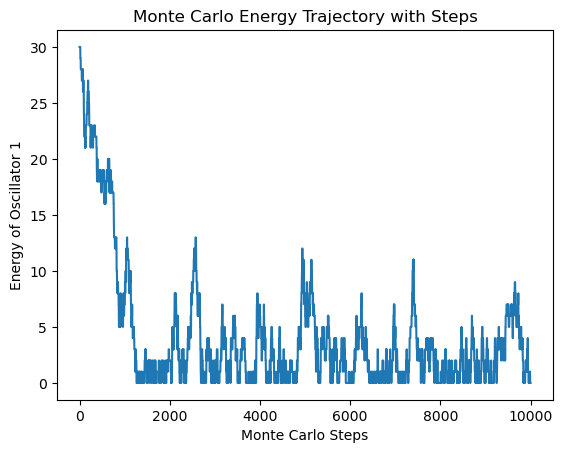

In [4]:
M = 10 # number of noninteracting qm oscillators (simulaing diatomics)
E = 30 # total energy

h = histogram(limits=[-0.5,E+0.5],binwidth=1)

n_quanta = zeros(M).astype(int) # array to track Energy for each oscillator 
n_quanta[0] = E # put all energy in oscillator 0

N_steps = 10000 # number of steps
n_trajectory = zeros(N_steps) # keeping track of history
for step in range(N_steps):
    donor = int(M * rand()) # randomly choose a donor and acceptor
    acceptor = int(M * rand()) 

    if n_quanta[donor] > 0: # metropolis condition: if has energy, donate to acceptor
        n_quanta[donor] -= 1
        n_quanta[acceptor] += 1

    n_trajectory[step] = n_quanta[0] # record trajectory and add to histogram object
    h.add_sample(n_quanta[0])

clf()
plot(arange(N_steps), n_trajectory)
xlabel('Monte Carlo Steps')
ylabel('Energy of Oscillator 1')
title('Monte Carlo Energy Trajectory with Steps')
savefig('Visualizations/1_ii.png')
# h.normalize() 
# h.barplot()

## (iii)

In [5]:
from tqdm import tqdm

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.79it/s]


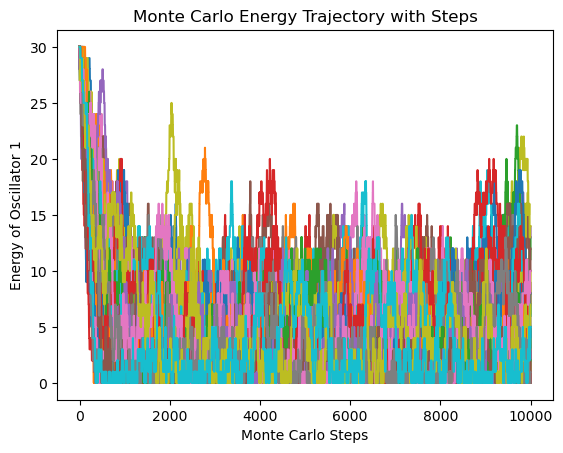

In [6]:
for i in tqdm(range(100)):
    M = 10 # number of noninteracting qm oscillators (simulaing diatomics)
    E = 30 # total energy
    
    h = histogram(limits=[-0.5,E+0.5],binwidth=1)
    
    n_quanta = zeros(M).astype(int) # array to track Energy for each oscillator 
    n_quanta[0] = E # put all energy in oscillator 0
    
    N_steps = 10000 # number of steps
    n_trajectory = zeros(N_steps) # keeping track of history
    for step in range(N_steps):
        donor = int(M * rand()) # randomly choose a donor and acceptor
        acceptor = int(M * rand()) 
    
        if n_quanta[donor] > 0: # metropolis condition: if has energy, donate to acceptor
            n_quanta[donor] -= 1
            n_quanta[acceptor] += 1
    
        n_trajectory[step] = n_quanta[0] # record trajectory and add to histogram object
        h.add_sample(n_quanta[0])

    plot(arange(N_steps), n_trajectory)


xlabel('Monte Carlo Steps')
ylabel('Energy of Oscillator 1')
title('Monte Carlo Energy Trajectory with Steps')
savefig('Visualizations/1_iii.png')

## (iv)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.67it/s]


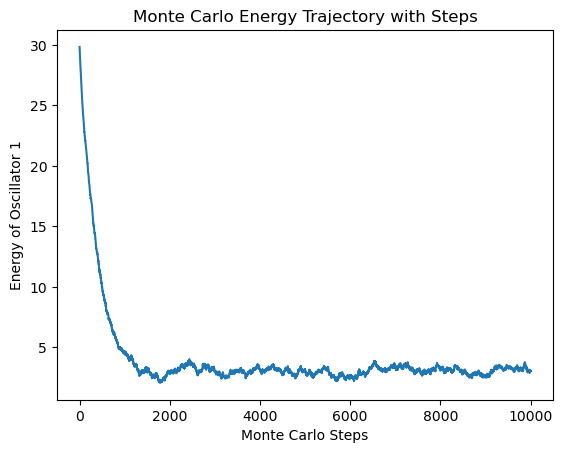

In [7]:
N_steps = 10000 
n_trajectorys = zeros((100, N_steps))

for i in tqdm(range(100)):
    M = 10 
    E = 30 
    
    h = histogram(limits=[-0.5,E+0.5],binwidth=1)
    
    n_quanta = zeros(M).astype(int) 
    n_quanta[0] = E 
    
    for step in range(N_steps):
        donor = int(M * rand()) 
        acceptor = int(M * rand()) 
    
        if n_quanta[donor] > 0:
            n_quanta[donor] -= 1
            n_quanta[acceptor] += 1
    
        n_trajectorys[i, step] = n_quanta[0]
        h.add_sample(n_quanta[0])

n_trajectory = np.sum(n_trajectorys, axis=0)/100
plot(arange(N_steps), n_trajectory)
xlabel('Monte Carlo Steps')
ylabel('Energy of Oscillator 1')
title('Monte Carlo Energy Trajectory with Steps')
savefig('Visualizations/1_iv.png')

In [8]:
n_trajectory_ten = [index for index in n_trajectory if index >= 10]
len(n_trajectory_ten)

502

Approximately 519 steps to fall below a value of 10. The variation appears to vary below $10^3$. 

## (v)

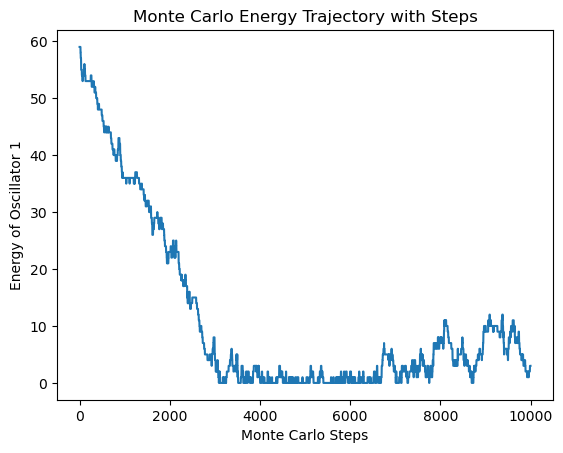

In [9]:
M = 20 # number of noninteracting qm oscillators (simulaing diatomics)
E = 60 # total energy

h = histogram(limits=[-0.5,E+0.5],binwidth=1)

n_quanta = zeros(M).astype(int) # array to track Energy for each oscillator 
n_quanta[0] = E # put all energy in oscillator 0

N_steps = 10000 # number of steps
n_trajectory = zeros(N_steps) # keeping track of history
for step in range(N_steps):
    donor = int(M * rand()) # randomly choose a donor and acceptor
    acceptor = int(M * rand()) 

    if n_quanta[donor] > 0: # metropolis condition: if has energy, donate to acceptor
        n_quanta[donor] -= 1
        n_quanta[acceptor] += 1

    n_trajectory[step] = n_quanta[0] # record trajectory and add to histogram object
    h.add_sample(n_quanta[0])

clf()
plot(arange(N_steps), n_trajectory)
xlabel('Monte Carlo Steps')
ylabel('Energy of Oscillator 1')
title('Monte Carlo Energy Trajectory with Steps')
savefig('Visualizations/1_v_1.png')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 26.11it/s]


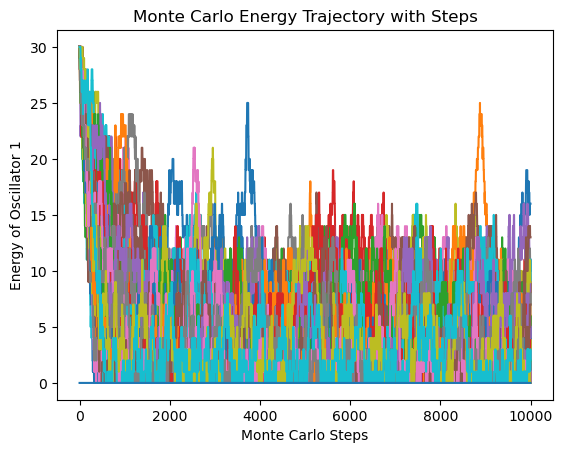

In [10]:
N_steps = 10000 
n_trajectorys = zeros((100, N_steps))

for i in tqdm(range(100)):
    M = 10 # number of noninteracting qm oscillators (simulaing diatomics)
    E = 30 # total energy
    
    h = histogram(limits=[-0.5,E+0.5],binwidth=1)
    
    n_quanta = zeros(M).astype(int) # array to track Energy for each oscillator 
    n_quanta[0] = E # put all energy in oscillator 0
    
    N_steps = 10000 # number of steps
    n_trajectory = zeros(N_steps) # keeping track of history
    for step in range(N_steps):
        donor = int(M * rand()) # randomly choose a donor and acceptor
        acceptor = int(M * rand()) 
    
        if n_quanta[donor] > 0: # metropolis condition: if has energy, donate to acceptor
            n_quanta[donor] -= 1
            n_quanta[acceptor] += 1
    
        n_trajectory[step] = n_quanta[0] # record trajectory and add to histogram object
        h.add_sample(n_quanta[0])

    plot(arange(N_steps), n_trajectory)

n_trajectory = np.sum(n_trajectorys, axis=0)/100
plot(arange(N_steps), n_trajectory)
xlabel('Monte Carlo Steps')
ylabel('Energy of Oscillator 1')
title('Monte Carlo Energy Trajectory with Steps')
savefig('Visualizations/1_v_2.png')

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 26.06it/s]


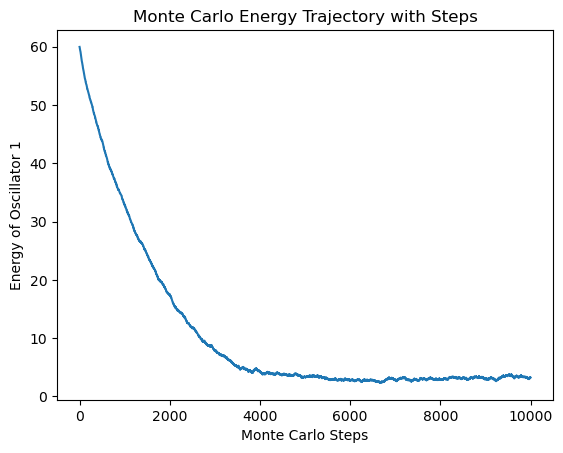

In [11]:
N_steps = 10000 
n_trajectorys = zeros((100, N_steps))

for i in tqdm(range(100)):
    M = 20 
    E = 60 
    
    h = histogram(limits=[-0.5,E+0.5],binwidth=1)
    
    n_quanta = zeros(M).astype(int) 
    n_quanta[0] = E 
    
    for step in range(N_steps):
        donor = int(M * rand()) 
        acceptor = int(M * rand()) 
    
        if n_quanta[donor] > 0:
            n_quanta[donor] -= 1
            n_quanta[acceptor] += 1
    
        n_trajectorys[i, step] = n_quanta[0]
        h.add_sample(n_quanta[0])

n_trajectory = np.sum(n_trajectorys, axis=0)/100
plot(arange(N_steps), n_trajectory)
xlabel('Monte Carlo Steps')
ylabel('Energy of Oscillator 1')
title('Monte Carlo Energy Trajectory with Steps')
savefig('Visualizations/1_v_3.png')

In [12]:
n_trajectory_ten = [index for index in n_trajectory if index >= 10]
len(n_trajectory_ten)

2678

## (vi)

1) A much higher Energy was placed in the first oscilaltor, taking more steps for the energy to diffuse
2) The likelyhood of the first oscillator being picked from the Metropolis Condition is halved

# Question 2

## (i)

In [13]:
from tqdm import tqdm

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 143020.37it/s]


Text(0, 0.5, 'p($n_1)$')

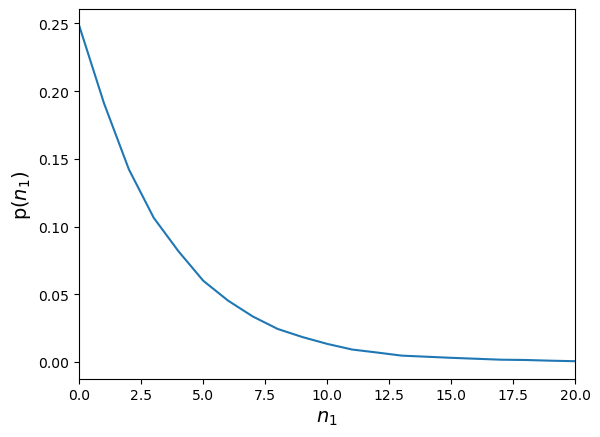

In [14]:
# import packages for basic math, plotting, linear algebra, etc.
from numpy import *
from numpy.linalg import *
from numpy.random import *
from matplotlib.pyplot import *
from scipy.special import binom, erf, erfc

class histogram():
    def __init__(self,limits,binwidth):
        self.limits = limits
        self.binwidth = binwidth
        self.vals = arange(self.limits[0] + self.binwidth / 2, self.limits[1], self.binwidth)
        self.histo = 0 * self.vals
        self.N_samples = 0

    def add_sample(self,dat):
        self.N_samples += 1
        if dat > self.limits[0] and dat < self.limits[1]:
            bin_index = int((dat - self.limits[0]) / self.binwidth)
            self.histo[bin_index] += 1

    def normalize(self):
        self.histo = self.histo / (self.N_samples * self.binwidth)

    def barplot(self):
        bar(self.vals, self.histo, width=0.95 * self.binwidth, color='k')

    def lineplot(self):
        plot(self.vals, self.histo)

energy_per_particle = 3 # E/M, assume this is an integer

M = 100
E = M * energy_per_particle

h = histogram(limits=[-0.5,E+0.5],binwidth=1)

n_quanta = ones(M).astype(int) * energy_per_particle

from numba import jit
@jit(nopython=True)
def MC_sweep(n_quanta):
    for step in range(M):
        donor = int(M * rand())
        acceptor = int(M * rand())

        if n_quanta[donor] > 0:
            n_quanta[donor] -= 1
            n_quanta[acceptor] += 1

    return n_quanta

n_quanta_zero = []
N_sweeps = 100000
for sweep in tqdm(range(N_sweeps)):
    n_quanta = MC_sweep(n_quanta)
    n_quanta_zero.append(n_quanta[0])
    h.add_sample(n_quanta[0])

# clf()
h.normalize()
h.lineplot()
xlim(0,20)
xlabel(r'$n_1$',fontsize=14)
ylabel(r'p($n_1)$',fontsize=14)


In [15]:
n_quanta_zero_sq = np.array(n_quanta_zero)**2
n_avg = np.mean(n_quanta_zero)
n_mse = np.mean(n_quanta_zero_sq)

n_avg_exact = E / M
n_mse_exact = n_avg_exact**2 + ((M-1)/(M+1)) * n_avg_exact * (1+n_avg_exact)
print(f'mean: {n_avg}, mean squared error: {n_mse}')
print(f'exact mean: {n_avg_exact}, exact mean squared error: {n_mse_exact}')

mean: 2.91024, mean squared error: 19.1953
exact mean: 3.0, exact mean squared error: 20.762376237623762


## (ii)

In [16]:
from numpy import *
from numpy.linalg import *
from numpy.random import *
from matplotlib.pyplot import *
from scipy.special import binom, erf, erfc
from tqdm import tqdm

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1215035.92it/s]


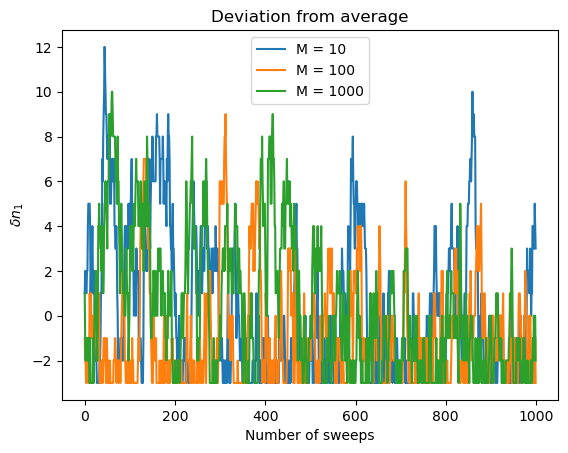

In [17]:
from numba import jit
@jit(nopython=True)
def MC_sweep(n_quanta):
    for step in range(M):
        donor = int(M * rand())
        acceptor = int(M * rand())

        if n_quanta[donor] > 0:
            n_quanta[donor] -= 1
            n_quanta[acceptor] += 1

    return n_quanta

energy_per_particle = 3
Ms = [10, 100, 1000]

for M in Ms:
    E = M * energy_per_particle
    
    n_quanta = ones(M).astype(int) * energy_per_particle
    
    n_quanta_zero = []
    N_sweeps = 1000
    for sweep in tqdm(range(N_sweeps)):
        n_quanta = MC_sweep(n_quanta)
        n_quanta_zero.append(n_quanta[0])

    n_avg_exact = E / M
    n_dev = np.array(n_quanta_zero) - n_avg_exact
    plot(range(1000), n_dev, label=f'M = {M}')
legend()
xlabel(r'Number of sweeps')
ylabel(r'$\delta n_1$')
title('Deviation from average')
savefig('Visualizations/2_ii.png')

Trajectory appears to be consistent across system sizes

## (iii)

In [18]:
energy_per_particle = 3 # E/M, assume this is an integer

M = 10
E = M * energy_per_particle

n_quanta = ones(M).astype(int) * energy_per_particle

n_trajectory = []
N_sweeps = 100000
for sweep in tqdm(range(N_sweeps)):
    n_quanta = MC_sweep(n_quanta)
    n_trajectory.append(n_quanta[0])

C = 0
C_count = 0
for t in range(N_sweeps - 1):
    C_count += 1
    C += (n_trajectory[t]-E/M) * (n_trajectory[t+1] - E/M )
C = C/C_count

print(f'C: {C}')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 1659139.24it/s]


C: 8.706167061670616


C, the average of the autocorrelation, is positive implying that whichever the sign is of the next signal, it is likely to be positive. A higher number corresponds to a strong correlation. 

## (iv)

In [19]:
C = 0
C_count = 0
for t in range(N_sweeps - 100):
    C_count += 1
    C += (n_trajectory[t]-E/M) * (n_trajectory[t+100] - E/M )
C = C/C_count

print(f'C: {C}')

C: -0.15356356356356357


The correlation is much weaker

## (v)

In [24]:
@jit(nopython=True)
def compute_correlation(n_trajectory, N_sweeps, tau):
    C = 0
    C_count = 0
    for t in range(N_sweeps - tau):
        C_count += 1
        C += (n_trajectory[t]-E/M) * (n_trajectory[t+tau] - E/M )
    C = C/C_count
    return C

@jit(nopython=True)
def MC_sweep(n_quanta, M):
    for step in range(M):
        donor = int(M * rand())
        acceptor = int(M * rand())

        if n_quanta[donor] > 0:
            n_quanta[donor] -= 1
            n_quanta[acceptor] += 1

    return n_quanta

energy_per_particle = 3 # E/M, assume this is an integer

M = 10
E = M * energy_per_particle

n_quanta = ones(M).astype(int) * energy_per_particle

n_trajectory = []
N_sweeps = 1000000
for sweep in tqdm(range(N_sweeps)):
    n_quanta = MC_sweep(n_quanta, M)
    n_trajectory.append(n_quanta[0])


taus = [tau+1 for tau in range(200)]
Cs = []

for tau in tqdm(taus):
    Cs.append(compute_correlation(n_trajectory, N_sweeps, tau))


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [01:55<00:00,  1.74it/s]


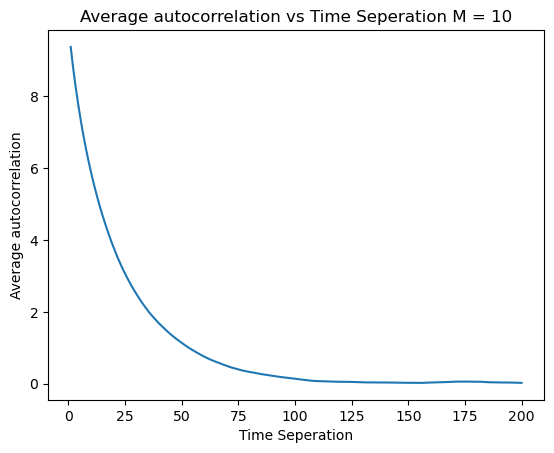

In [25]:
plot(taus, Cs)
xlabel('Time Seperation')
ylabel('Average autocorrelation')
title('Average autocorrelation vs Time Seperation M = 10')
savefig('Visualizations/2_v.png')

## (vi)

In [26]:
energy_per_particle = 3
Ms = [10, 20, 30]
Css = []

for M in Ms:
    E = M * energy_per_particle

    n_quanta = ones(M).astype(int) * energy_per_particle
    
    n_trajectory = []
    N_sweeps = 1000000
    for sweep in tqdm(range(N_sweeps)):
        n_quanta = MC_sweep(n_quanta, M)
        n_trajectory.append(n_quanta[0])

    
    taus = [tau+1 for tau in range(200)]
    Cs = []
    
    for tau in tqdm(taus):
        Cs.append(compute_correlation(n_trajectory, N_sweeps, tau))
    Css.append(Cs)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [01:54<00:00,  1.74it/s]


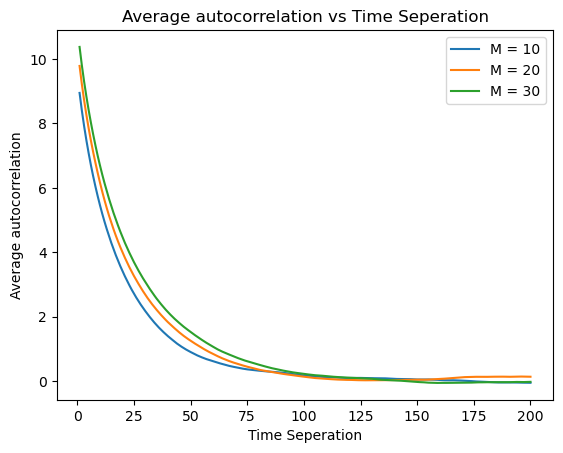

In [28]:
for index, M in enumerate(Ms):
    plot(taus, Css[index], label=f'M = {M}')
legend()
xlabel('Time Seperation')
ylabel('Average autocorrelation')
title('Average autocorrelation vs Time Seperation')
savefig('Visualizations/2_vi.png')

The autocorrelation averages descend faster with smaller systems. This implies that a chosen oscillator retains energy across a longer time span with larger system. This makes sense because in larger systems, the Metropolis condition is less likely to random select the oscillator index of interest. 

## (vii)

In [ ]:
energy_per_particle = 3
M = 10
E = M * energy_per_particle

n_avg_exact = E / M
n_mse_exact = n_avg_exact**2 + ((M-1)/(M+1)) * n_avg_exact * (1+n_avg_exact)

C_0 = n_mse_exact - n_avg_exact**2
C_tau = C_0 / np.e

trajectory = [t for t in Css[0] if t >= C_tau]
len(trajectory)

$\tau_{\text{corr}} = 19$ steps

## (viii)

Out of $t$ total sweeps, approximately every $\tau_{\text{corr}}$ is statistically independent. Therefore total statistically independent samples in $t$ sweeps can approximated by dividing the total samples with the correlation time, or: 

$$N_{\text{indep}} \approx \frac{t}{\tau_{\text{corr}}}$$

In part (vii):

$$N_{\text{indep}} \approx \frac{10^3}{19} \approx 52.6$$
